<a href="https://colab.research.google.com/github/ademaldemir/DataScienceWithPython/blob/main/Real_Estate_Pricing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [10]:
# Read data from CSV file
df = pd.read_csv('/content/drive/My Drive/Master Courses/Data Science with Python/Lecture 5 /real_estate.csv')

In [3]:
# Show the first 5 rows
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
# Check the rows with missing values (if any)
df.isnull().sum()
# df.dropna(inplace=True)

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [5]:
# Print the number of rows (instances) and columns (features)
df.shape

(414, 8)

In [6]:
# Find the correlation between features (hints: pearson correlation)
df.corr(method='pearson')

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [11]:
# Eliminate the two features least correlated to the other features
df.drop(['No', 'X1 transaction date'], axis=1, inplace=True)

In [9]:
# Print the first 5 rows again
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


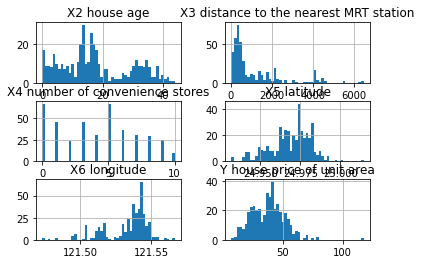

In [13]:
# Draw histogram of the data
df.hist(bins=50);
#Number of histogram bins to be used. If an integer is given, bins + 1 bin edges are calculated and returned. 
#If bins is a sequence, gives bin edges, 
#including left edge of first bin and right edge of last bin. In this case, bins is returned unmodified.

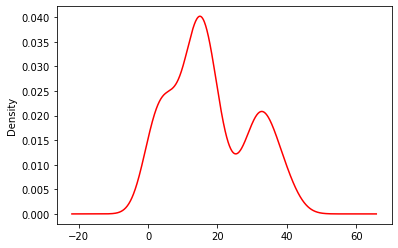

In [14]:
# Plot the one feature as a probability density function
df['X2 house age'].plot(kind='density', color='Red');

In [15]:
# Split the data to independent variables & dependent variable
x = df.iloc[:,0:5].values
y = df.iloc[:,-1].values

In [16]:
# Split the data to training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=147)

In [17]:
# Print the number of instances in training & test set
print(x_train.shape)
print(x_test.shape)

(331, 5)
(83, 5)


In [18]:
# Initialize min-max scaler and transform each feature by using min-max scaler
# You need to put the feature values to a certain range (in general: (0, 1)) in order to stabilize the model
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_train

array([[0.04683841, 0.31772964, 0.3       , 0.45599305, 0.42872547],
       [0.75644028, 0.01339018, 1.        , 0.7201795 , 0.72600819],
       [0.07259953, 0.05576175, 0.5       , 0.70613781, 0.75889584],
       ...,
       [0.06088993, 0.23680632, 0.3       , 0.55283729, 0.46247574],
       [0.63466042, 0.67898343, 0.1       , 0.26418645, 0.24088851],
       [0.42388759, 0.27221897, 0.3       , 0.51013318, 0.44565452]])

In [19]:
# Print the first row of training data
x_train[0]

array([0.04683841, 0.31772964, 0.3       , 0.45599305, 0.42872547])

In [20]:
# Initialize the linear regression model
model = LinearRegression()

In [21]:
# Fit the training data to the model
model.fit(x_train, y_train)
model.coef_

array([-11.41546636, -27.72027383,   9.92809326,  18.14598691,
        -0.52042007])

In [23]:
# Print the general formula of our linear regression model
_str = "y = "
for i, m in enumerate(model.coef_):
    _str += "x_{}*({})+".format(i+1, m)
_str += str(model.intercept_)
print(_str)

y = x_1*(-11.415466361050509)+x_2*(-27.720273827351203)+x_3*(9.928093263967398)+x_4*(18.145986910991528)+x_5*(-0.5204200712795819)+33.996897407161704


In [24]:
# Scale each feature to range(0, 1)
x_test = scaler.transform(x_test)
x_test

array([[0.05854801, 0.02055202, 0.4       , 0.50506659, 0.71587233],
       [0.42154567, 0.97186726, 0.1       , 0.3671106 , 0.01757602],
       [1.02576112, 0.00529134, 0.7       , 0.51288361, 0.72417511],
       [0.31850117, 0.62782047, 0.        , 0.13723219, 0.32650421],
       [0.        , 0.03876962, 0.1       , 0.61855819, 0.61526849],
       [0.09133489, 0.00406492, 0.8       , 0.38057325, 0.69042484],
       [0.30444965, 0.07252509, 0.5       , 0.47886508, 0.68837611],
       [0.93208431, 0.09193563, 0.2       , 0.63259988, 0.66012508],
       [0.15456674, 0.0103754 , 0.9       , 0.61175449, 0.75016174],
       [0.50819672, 0.15958885, 0.        , 0.43485814, 0.81679965],
       [0.29039813, 0.26130607, 0.2       , 0.46395483, 0.46549493],
       [0.30444965, 0.07252509, 0.5       , 0.47886508, 0.68837611],
       [0.47540984, 0.04087153, 0.6       , 0.69991314, 0.74131982],
       [0.1147541 , 0.05636654, 0.9       , 0.71091488, 0.69387535],
       [0.69320843, 0.1154002 , 0.

In [25]:
# Print the first row of test data
x_test[0]

array([0.05854801, 0.02055202, 0.4       , 0.50506659, 0.71587233])

In [26]:
# Predict the values by using all test data
y_pred = model.predict(x_test)

In [27]:
# Print the predicted and the actual value of the first row in test set
"Predicted: {}, Actual: {}".format(y_pred[1], y_test[1])

'Predicted: 9.889577006674443, Actual: 15.0'

In [28]:
# Calculate the score of the model in test data
score = model.score(x_test, y_test)
print(score)

0.6410674664708822


In [29]:
# Calculate mean squared error of predicted values
mse = mean_squared_error(y_test, y_pred)
print(mse)

65.85474357820151


In [30]:
# Calculate absolute squared error of predicted values
mae = mean_absolute_error(y_test, y_pred)
print(mae)

6.426730639068006


In [31]:
# Save the model
import pickle
with open("./lr_model_score{}_mse{}_mae{}.pkl".format(score, mse, mae), "wb") as f:
    pickle.dump(model, f)